In [1]:
%matplotlib notebook

In [2]:
from pyk4a import PyK4A, Config, Calibration
import numpy as np
from copy import deepcopy
import pyk4a
from matplotlib import pyplot as plt
from matplotlib.pyplot import subplots
import matplotlib.animation as animation
from IPython.display import HTML
import json

In [3]:
import numpy as np
import pyk4a
from pyk4a import Config, PyK4A, Calibration, CalibrationType
config = Config(depth_mode=pyk4a.DepthMode.WFOV_2X2BINNED,
                    synchronized_images_only=True)
k4adev = PyK4A(config=config)
calib = Calibration(device = k4adev,
                    config=config,
                    source_calibration=CalibrationType.COLOR,
                    target_calibration=CalibrationType.COLOR)
k4adev.connect()

In [4]:
# Get the next color frame without the depth (blocking function)
img_color, img_depth = k4adev.get_capture(color_only=False, transform_depth_to_color=True)
img_color.shape, img_depth.shape

((720, 1280, 4), (720, 1280))

In [19]:
pix2d = [400, 450]
depth = img_depth[pix2d[0]][pix2d[1]]
valid, coords = calib.convert_2d_to_3d(pix2d, depth, target_camera=CalibrationType.GYRO)# , CalibrationType.COLOR, CalibrationType.COLOR)
if valid:
    print(f'Coords = {coords}')
else:
    print(f'Unvalid coordinates - falls out of specs.')

Coords = [-1249.5899658203125, 439.55426025390625, 180.60333251953125]


<IPython.core.display.Javascript object>


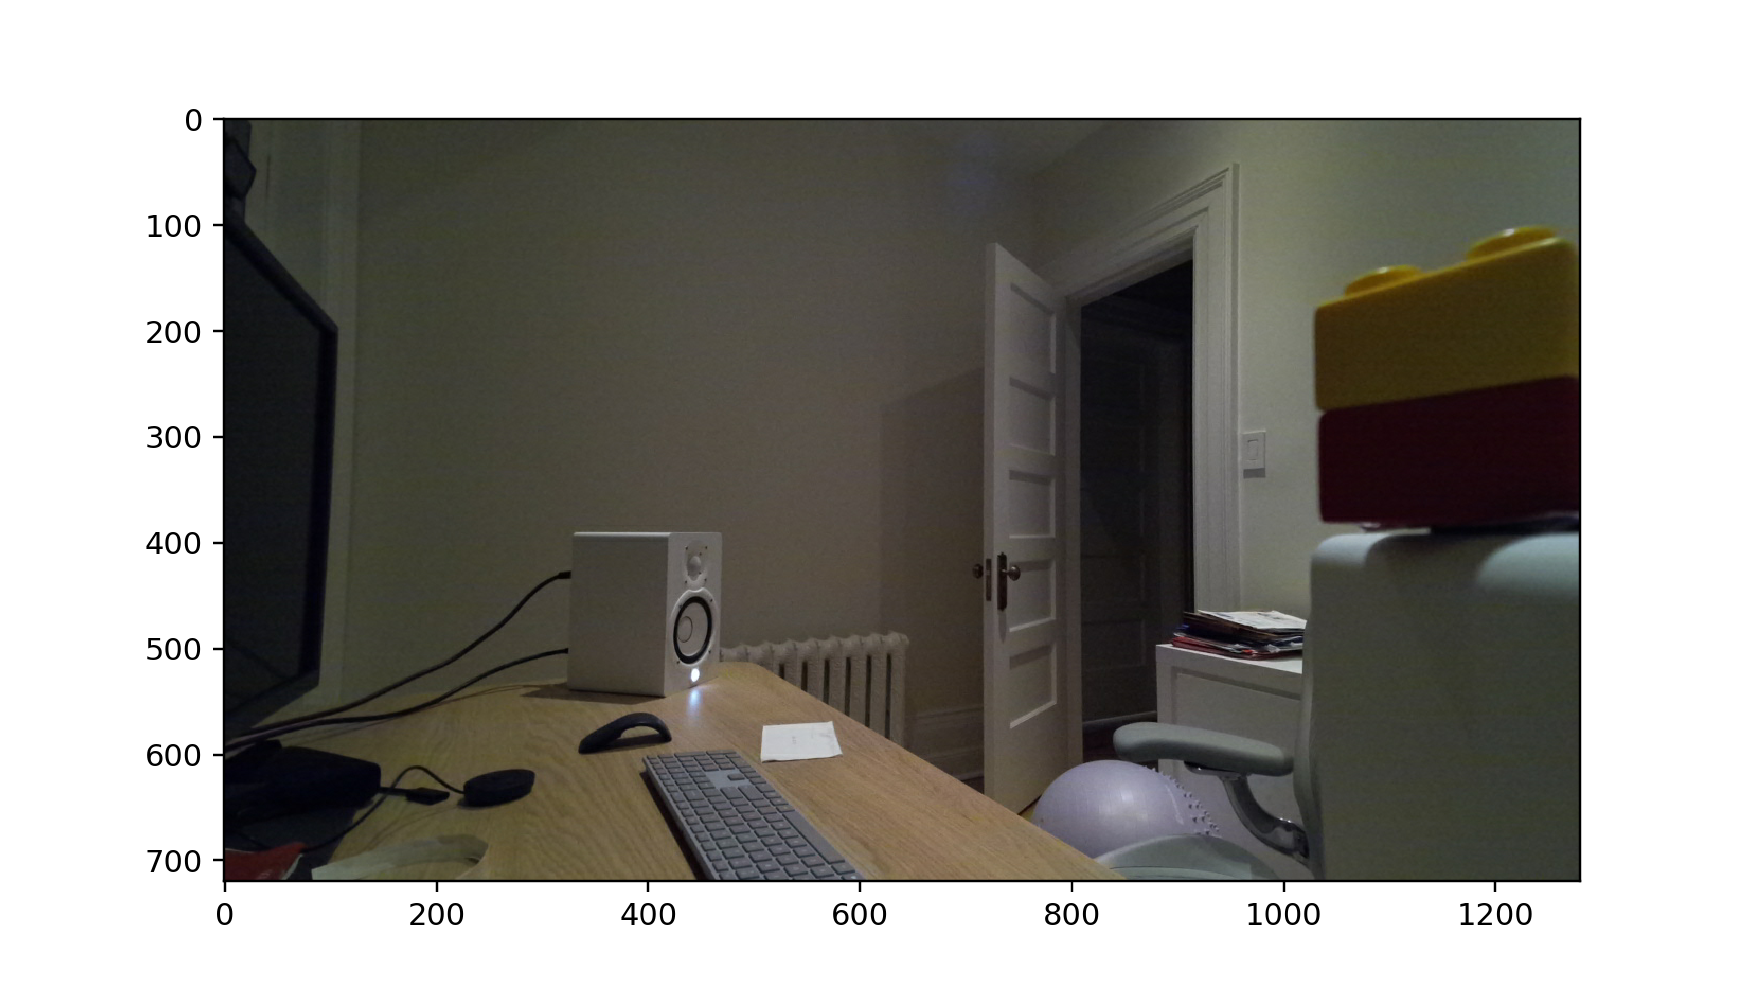

In [21]:
# Display with pyplot
fig, ax = subplots(figsize=(16/2, 9/2))
im_depth = plt.imshow(img_depth, cmap='gray')
im_color = plt.imshow(img_color[:, :, :3][...,::-1])    # BGRA to RGB for matplotlib
ims = []
ims.append([im_depth]) # , im_color]
ims.append([im_color])
ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True)     # , repeat_delay=1000)
HTML(ani.to_jshtml())
plt.show()
# HTML(ani.to_html5_video())

In [18]:
x = rect_pt1[0]
y = rect_pt1[1]
h = rect_pt2[1] - y
w = rect_pt2[0] - x
rect_pt1 = (630, 275)
rect_pt2 = (804, 475)

In [28]:
img_depth[y:y+h,x:x+w]

array([[  0,   0,   0, ..., 331, 331, 331],
       [  0,   0,   0, ..., 331, 331, 331],
       [  0,   0,   0, ..., 330, 330, 330],
       ...,
       [242, 242, 240, ..., 209, 210, 210],
       [242, 242, 241, ..., 209, 210, 210],
       [242, 242, 241, ..., 209, 210, 210]], dtype=uint16)

In [30]:
np.round(np.average(img_depth[y:y+h, x:x+w]))

149.0

In [ ]:
from math import floor
fig, ax = subplots(figsize=(16/2, 9/2))
#im_depth = plt.imshow(img_color[:, :, :3][...,::-1]) # , cmap='gray')
img_color, img_depth = k4a.get_capture(color_only=False, transform_depth_to_color=True)
im_depth = plt.imshow(img_depth, cmap='gray')
text=ax.text(0, .05, "Depth : ", va="bottom", ha="left")

def onclick(event):
    x = floor(event.xdata)
    y = floor(event.ydata)
#     tx = floor(event.xdata)
    if img_depth[x, y]:
        tx = 'x=%d, y=%d, depth =%d' % (x, y, img_depth[x, y])
    else:
        tx = 'x=%d, y=%d, depth = NO VALUE' % (x, y)
    text.set_text(tx)
    print(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

In [4]:
k4adev.disconnect()